#       **EUROTRIP INSIGHTS**
A deep dive into tourist travel across Europe

## Objectives

* To upload the raw data from Kaggle and perform basic data cleaning,necessary transformation and basic visualisations.
## Inputs

* The dataset "https://www.kaggle.com/datasets/ashaychoudhary/tourist-travel-modes-in-europe-dataset/data" was uploaded in its raw form for the ETL phase of the analysis.

## Outputs

*   Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/hackathon2/Hackathon2-Team-3/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/hackathon2/Hackathon2-Team-3'

# Section 1

Initial Data Exploration

In [5]:

import pandas as pd

# Load the dataset

df = pd.read_csv('Tourist_Travel_Europe.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


In [6]:
# Check for missing values
df.isnull().sum()

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
# Check for negative values
negative_values = df.select_dtypes(include=['number'])[df.select_dtypes(include=['number']) < 0].dropna(how='all')
print(negative_values)

Empty DataFrame
Columns: [Tourist_ID, Travel_Duration_Days, Number_of_Companions, Total_Travel_Cost]
Index: []


In [9]:
# Checking for unique values in categorical columns in case of duplicates due to typos
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'Country_Visited':
['Germany' 'UK' 'Greece' 'Portugal' 'Spain' 'Austria' 'Italy'
 'Netherlands' 'France' 'Switzerland']
Unique values in 'City_Visited':
['Hamburg' 'Berlin' 'Manchester' 'Thessaloniki' 'Athens' 'Lisbon' 'Faro'
 'Madrid' 'Salzburg' 'London' 'Rome' 'Utrecht' 'Paris' 'Lucerne' 'Porto'
 'Lyon' 'Edinburgh' 'Seville' 'Rotterdam' 'Vienna' 'Santorini' 'Innsbruck'
 'Barcelona' 'Zurich' 'Nice' 'Geneva' 'Amsterdam' 'Venice' 'Milan'
 'Munich']
Unique values in 'Mode_of_Travel':
['Flight' 'Car' 'Bicycle' 'Bus' 'Train']
Unique values in 'Accommodation_Type':
['Hotel' 'Hostel' 'Camping' 'Airbnb']
Unique values in 'Main_Purpose':
['Family Visit' 'Business' 'Leisure']
Unique values in 'Season_of_Visit':
['Summer' 'Winter' 'Spring' 'Fall']


In [10]:
import numpy as np
import pandas as pd

In [11]:
import plotly.express as px

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Store outlier counts
outlier_counts = {}

# Iterate through each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

    # Display box plot for each numerical column
    fig = px.box(df, y=col, title=f"Outlier Detection in {col}")
    fig.show()

# Print outlier summary
print("Outlier Counts per Column:")
print(outlier_counts)

Outlier Counts per Column:
{'Tourist_ID': 0, 'Travel_Duration_Days': 0, 'Number_of_Companions': 0, 'Total_Travel_Cost': 0}


---

# Spending and Travel Duration

To check  for the correlation between Total_Travel_Cost and Travel_Duration_Days using scatterplot with trend lines

---

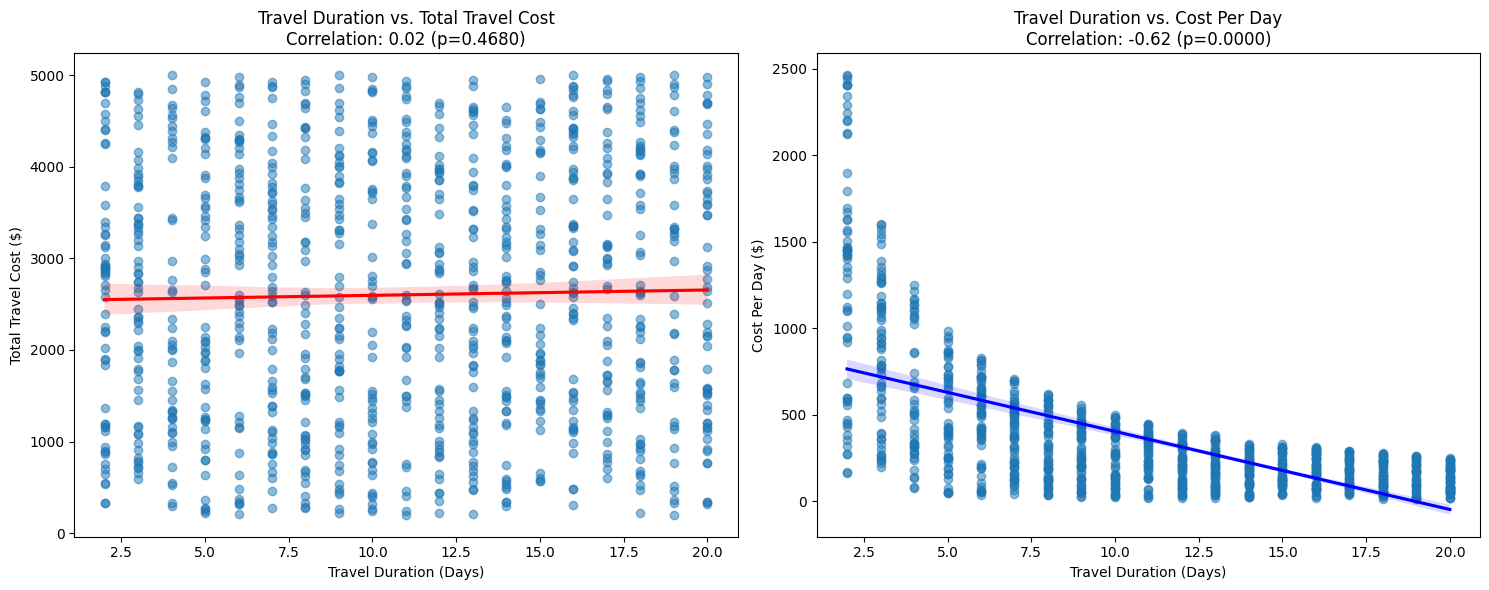

(0.022974554234132975,
 0.4680188329952053,
 -0.6239126133813776,
 5.576011858974762e-109)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2: Create a new column for Cost Per Day
df["Cost_Per_Day"] = df["Total_Travel_Cost"] / df["Travel_Duration_Days"]

# Step 3: Analyze correlations
correlation_total_cost, p_value_total_cost = stats.pearsonr(df["Travel_Duration_Days"], df["Total_Travel_Cost"])
correlation_cost_per_day, p_value_cost_per_day = stats.pearsonr(df["Travel_Duration_Days"], df["Cost_Per_Day"])

# Step 4: Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Total Travel Cost vs. Travel Duration
sns.regplot(x="Travel_Duration_Days", y="Total_Travel_Cost", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title(f"Travel Duration vs. Total Travel Cost\nCorrelation: {correlation_total_cost:.2f} (p={p_value_total_cost:.4f})")
axes[0].set_xlabel("Travel Duration (Days)")
axes[0].set_ylabel("Total Travel Cost ($)")

# Scatter plot for Travel Duration vs. Cost Per Day
sns.regplot(x="Travel_Duration_Days", y="Cost_Per_Day", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_title(f"Travel Duration vs. Cost Per Day\nCorrelation: {correlation_cost_per_day:.2f} (p={p_value_cost_per_day:.4f})")
axes[1].set_xlabel("Travel Duration (Days)")
axes[1].set_ylabel("Cost Per Day ($)")

plt.tight_layout()
plt.show()

# Return correlation results
correlation_total_cost, p_value_total_cost, correlation_cost_per_day, p_value_cost_per_day


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
